# Let's build an image classifier model to distinguish between biryani and pulao using minimal code using fastai


## Download and Install the dependency



In [ ]:
   !pip install -Uqq fastai
   !pip install -Uqq duckduckgo_search

In [2]:
!pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 78.7 MB/s eta 0:00:00


# Downloading Images with the DuckDuckGo Search API.

In [26]:
from duckduckgo_search import DDGS #
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [29]:
urls = search_images('biryani photos', max_images=1)
urls[0]

'https://norecipes.com/wp-content/uploads/2017/05/chicken-biryani-12-1200x1799.jpg'


# Download and display a sample biryani image


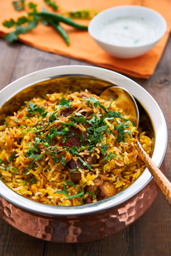

In [30]:
from fastdownload import download_url
dest = 'biryani.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

# Download and display the sample pulao image

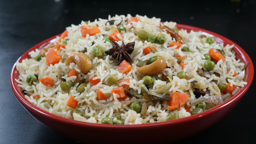

In [17]:
download_url(search_images('pulao photos', max_images=1)[0], 'pulao.jpg', show_progress=False)
Image.open('pulao.jpg').to_thumb(256,256)

# Download a few sample images and store them in a directory

In [18]:
searches = 'biryani','pulao'
path = Path('biryani_or_pulao')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [41]:
Path('biryani_or_pulao').ls()

(#2) [Path('biryani_or_pulao/biryani'),Path('biryani_or_pulao/pulao')]

In [42]:
Path('biryani_or_pulao/biryani').ls()

(#174) [Path('biryani_or_pulao/biryani/17e337aa-0f1f-4308-870d-af00065fb1d7.jpg'),Path('biryani_or_pulao/biryani/f1f7c76e-641e-4068-ab5a-a6a654a2df74.jpg'),Path('biryani_or_pulao/biryani/e1b5b551-4686-440e-b43b-47e84c8999bb.jpg'),Path('biryani_or_pulao/biryani/5076de53-8079-438d-b89c-fdd411a1e653.jpg'),Path('biryani_or_pulao/biryani/aeffe34a-c897-47f1-b69d-12d74b1fa59a.jpg'),Path('biryani_or_pulao/biryani/f747a9f3-c1eb-4397-a904-1f8899bd19d1.jpg'),Path('biryani_or_pulao/biryani/cbd00d4a-426e-4625-845d-9fc1a539c9d1.png'),Path('biryani_or_pulao/biryani/71fc60b9-5508-43bb-9cf6-b6c89e2f635b.jpg'),Path('biryani_or_pulao/biryani/4e3b1f22-27aa-45ef-a87b-c947c652cc3d.jpg'),Path('biryani_or_pulao/biryani/eeb50ba0-3179-4b45-a7d2-fb170edb41f4.jpg'),Path('biryani_or_pulao/biryani/5536f520-25c6-4f74-8d5a-f8b2748f4152.png'),Path('biryani_or_pulao/biryani/4964f454-4820-4d81-bd85-20be06293a5c.jpg'),Path('biryani_or_pulao/biryani/debfdb4d-2464-4537-8d2a-4b159047062a.jpg'),Path('biryani_or_pulao/biryani

In [43]:
Path('biryani_or_pulao/pulao').ls()

(#191) [Path('biryani_or_pulao/pulao/30f11181-d643-4f19-bb70-3900cff8b90b.JPG'),Path('biryani_or_pulao/pulao/8bb4a1a0-d7e6-4054-8ed0-16d9fa68ab91.webp'),Path('biryani_or_pulao/pulao/aaac006b-7285-4833-85f3-a21eb43f14d6.jpg'),Path('biryani_or_pulao/pulao/7dd32886-28e4-4da3-a5fa-98e5adc198a1.jpg'),Path('biryani_or_pulao/pulao/0f83b123-0e3a-461e-9677-67cc01561da1.jpg'),Path('biryani_or_pulao/pulao/f0e1241c-22cb-466e-975f-71bd83d37f19.jpg'),Path('biryani_or_pulao/pulao/2dac1277-77ea-47bf-bf2b-511d261d858a.jpg'),Path('biryani_or_pulao/pulao/e383c40e-749e-47a5-b57e-ce20cd99c50d.jpg'),Path('biryani_or_pulao/pulao/dd11740c-dbec-40ef-844f-be91efd01178.jpg'),Path('biryani_or_pulao/pulao/f6a40dea-5993-4259-a248-090dbbb0cd4e.jpg'),Path('biryani_or_pulao/pulao/9fdf60c1-2a0b-49e7-92e9-e34751e21be4.jpg'),Path('biryani_or_pulao/pulao/491129c8-b027-4cf0-b5fc-3e9439167189.jpg'),Path('biryani_or_pulao/pulao/66ed3e44-7e7f-4d8a-9914-8c8ebef35e55.jpg'),Path('biryani_or_pulao/pulao/38a84c67-016b-4ef5-a674-5b

# Using the DuckDuck API, we downloaded a total dataset of 365 food images, consisting of `174` biryani images and `191` pulao images.

# Remove dead link images from the dataset.

In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

# Let's create and check our dataset of biryani and pulao images,

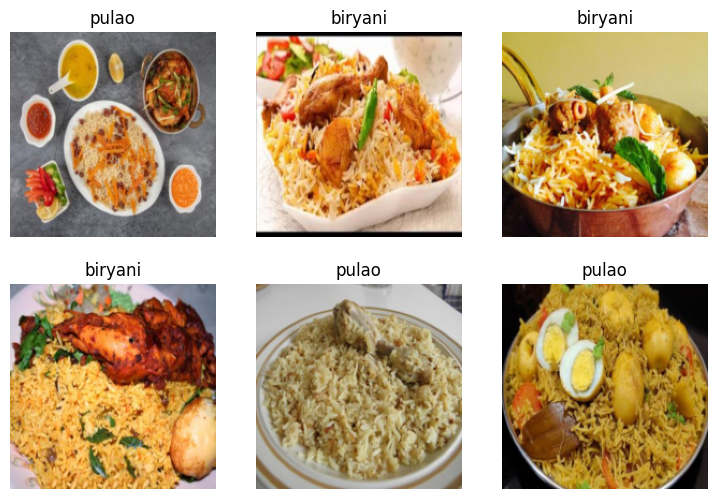

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)


 # Let's train it using the ResNet-18 architecture for 3 epochs

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.384120,0.823890,0.394366,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.811057,0.701266,0.309859,00:01
1,0.604012,0.655145,0.309859,00:01
2,0.483631,0.650361,0.338028,00:02
3,0.379953,0.638128,0.323944,00:01
4,0.315581,0.632960,0.253521,00:01


# Let's begin our predictions.


In [36]:

is_biryani,_,probs = learn.predict(PILImage.create('biryani.jpg'))
print(f"This is a: {is_biryani}.")
print(f"Probability it's a biryani: {probs[0]:.4f}\nProbability it's a pulao image: {probs[1]:.4f}")

This is a: biryani.
Probability it's a biryani: 0.8207
Probability it's a pulao image: 0.1793
